# Affordable Care Act Health Insurance Coverage Analysis

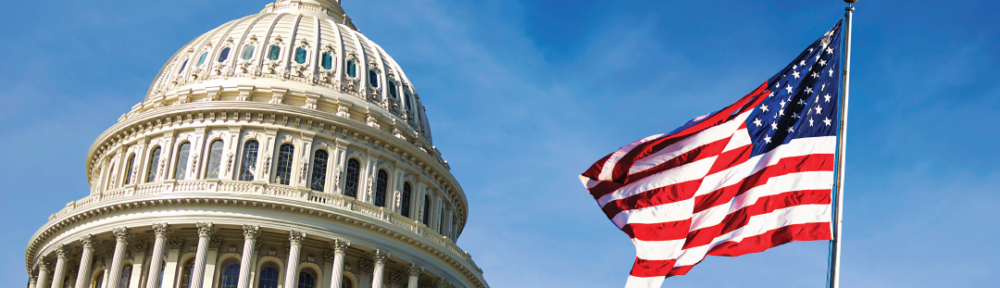

<font size = 4>By: Calvin King</font><br>
<font size = 4>Date: April 16, 2022</font>


<font size = 3> The 'Affordable Care Act (ACA) was signed into law on March 23, 2010 and was designed to reduced the costs that US citizens pay in uncompensated healthcare.<br><br>
    The law requires every American to hold health insurance and it becomes necessary to understand how this mandate has shaped US health policy and impacted Americans since its implementation.<br>    
    In the following notebook we are going to be performing an impact analysis on a collection of data pertaining to US health insurance coverage after the ACA was signed into law. Afterwards, we'll conclude whether the ACA positively or negatively impacted the US healthcare system. </font>

<hr/>

<h2>Importing the data</h2>

<font size = 3>For this analysis, I'll be using Kaggle's 'Health Insurance Coverage' dataset, which can be found <a href='https://www.kaggle.com/datasets/hhs/health-insurance'>here</a></font>.

In [2]:
#Importing the required libraries:
import numpy as np #Linear equations
import matplotlib.pyplot as plt #plotting visualizations
import seaborn as sns #deeper visualizations
import pandas as pd #dataframe control

In [41]:
#Saving file to e-Notebook:
projectName = 'ACA Health Insurance Coverage Analysis'
jovian.commit(project=projectName)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "xxkohxx/aca-health-insurance-coverage-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis


'https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis'

<hr/>

<h2>1. Data Prep and Cleaning</h2> 

<font size = 3>Now that we have the data imported, I will prepare teh data for further analysis by pre-analyzing, cleaning, and tidying the dataset.<br><br>First we'll check out the data's layout and structure:</font>

In [162]:
df = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\A_JovianCourse\Assignments\health-insurance\states.csv')
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


<b>Insight</b>
- The first 3 columns have '%' formatting which will need to be removed. 
- I should check the datatypes first to make sure they're flexible.

The first three columns of the dataset contain percentage `%` symbols. This leads me to believe that it has an object-based datatype which needs to be coverted to float-based in order to make numerical calculations and comparisons. 

My next step will be to check the datatypes of all columns and deal with the symbol and data-type mismatch (if applicable):

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         52 non-null     object 
 1   Uninsured Rate (2010)                         52 non-null     object 
 2   Uninsured Rate (2015)                         52 non-null     object 
 3   Uninsured Rate Change (2010-2015)             52 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  52 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     52 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  52 non-null     int64  
 7   Marketplace Tax Credits (2016)                52 non-null     int64  
 8   Average Monthly Tax Credit (2016)             52 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

<ins>Insights</ins>
From the info list, I observe the following: 

- 9, 10, and 12 have null values
- Other null values will be filled with Mean Imputation
- Cols 1-3 are object types despite having numeric values. Change to float. 
- The 'Average Monthly Tax Credits (2016)' column is also object-based. May need to changed.

The datatype mismatch was confirmed, so I will certainly have to deal with the symbols and datatype conversion. Additionally, there appears to be null values within the dataset and the object-based data in index #9 is worth looking at in further detail.

At this point, I'm not sure if index #9 is important to the overall analysis, so I will check it before I begin performing any adjustments to the data. 

My next step is to gather the actual number of null values by column and view the values in each: 

In [164]:
df.loc[df.isnull().any(axis=1)]

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136
19,Maine,10.1%,8.4%,-1.7%,22000,702000,75240,63896,$342,False,NaN,273160,NaN,315160
51,United States,15.5%,9.4%,6.1%,19304000,172292000,11081330,9389609,$291,NaN,56392477.0,73532931,16106157.0,57149984


<b>Insights</b>
- The 'State' column has a row called "United States" that aggregates all the values. 
    - This could be useful as a standalone comparison, but must be separated from the data to avoid skewing. 
- The 'State Medicaid Expansion (2016) column  has text-based T/F values
    - These values will need to be normalized to 0/1 for calculation purposes (research)
    
The exploration of null values has revealed that data from the "United States" value located in the 'State' column may heavily skew data. However, it may prove useful for an overall comparison so I will store it in its own variable. 

Additionally, the 'State Medicaid Expansion' column will need to have it's values updated to binary 0 (False)/ 1 (True) to make later comparisons easier. The column itself is only registered as NaN due to the United States row. 

First, I'll give the United States row it's own dataframe then remove it from the original dataset: 

In [165]:
#Create a copy of the old dataframe
USagg = df.copy()

In [166]:
#Dropping every row except 'United States':
USagg.drop(df.index[0:51], inplace=True); 

#Review new DF:
USagg

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
51,United States,15.5%,9.4%,6.1%,19304000,172292000,11081330,9389609,$291,NaN,56392477.0,73532931,16106157.0,57149984


In [167]:
#Removing US from original dataset: 
df.drop(df.index[51], inplace=True)

In [168]:
#View results: 
df.tail(1)

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
50,Wyoming,14.9%,11.5%,-3.4%,20000,335000,22076,20313,$459,False,67518.0,63583,-3935.0,99128


Removing the 'United States' should have elminated the NaN values for the State Expansion column. I'll check that before I continue...

In [169]:
#Check NaN values for Medicaid Expansion: 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Uninsured Rate (2010)                         51 non-null     object 
 2   Uninsured Rate (2015)                         51 non-null     object 
 3   Uninsured Rate Change (2010-2015)             51 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  51 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     51 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  51 non-null     int64  
 7   Marketplace Tax Credits (2016)                51 non-null     int64  
 8   Average Monthly Tax Credit (2016)             51 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     objec

With the 'Nan' values taken care of in the Medicaid Expansion column, I can start working to normalize the values in that column and change the datatype to 'int'.

In [170]:
#Replace text values with numeric:
df['State Medicaid Expansion (2016)'].replace(True or 'True', 1, inplace=True)

In [171]:
#Replace False Values:
df['State Medicaid Expansion (2016)'].replace('False', 0, inplace=True)
df['State Medicaid Expansion (2016)'].replace(False, 0, inplace=True)

In [172]:
#Converting datatype to int: 
df = df.astype( { 'State Medicaid Expansion (2016)': int } )

In [173]:
#View Results
df['State Medicaid Expansion (2016)'].head(3)

0    0
1    1
2    1
Name: State Medicaid Expansion (2016), dtype: int32

With that completed, we can move to clean up the NaN values for columns 10 and 12. This will done by imputing the values by the respective column mean: 

In [174]:
#Replacing index #10 null values: 
df['Medicaid Enrollment (2013)'].replace(np.nan,df['Medicaid Enrollment (2013)'].mean(),inplace=True)

In [175]:
#Replacing index #12 null values: 
df['Medicaid Enrollment Change (2013-2016)'].replace(np.nan, df['Medicaid Enrollment Change (2013-2016)'].mean(), inplace=True)

In [176]:
#Checking to see if all navalues were filled: 
df.isna().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

Now that all of the 'NaN' values have been handled, I'll move on to cleaning up the symbols and changing the datatypes for indexes 1-3:


In [177]:
# Symbol '%'' removal from col 1
df['Uninsured Rate (2010)'] = df['Uninsured Rate (2010)'].apply(lambda a: a[:-1])

# Symbol '%'' removal from col 2
df['Uninsured Rate (2015)'] = df['Uninsured Rate (2015)'].apply(lambda a: a[:-1])

In [179]:
# Symbol '%'' removal col 3
df['Uninsured Rate Change (2010-2015)'] = list(map(lambda x: x[:-1], df['Uninsured Rate Change (2010-2015)'].values))

df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,$310,0,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5,36000,390000,17995,16205,$750,1,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,$230,1,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8,234000,1365000,63357,56843,$306,1,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,$309,1,7755381.0,11843081,4087700.0,5829777


With the `%` removed from the column names, I can now convert the datatypes into floats: 

In [180]:
#Converting columns 1-3 to float-type:
df['Uninsured Rate (2010)'] = [float(x) for x in df['Uninsured Rate (2010)'].values]
df['Uninsured Rate (2015)'] = [float(x) for x in df['Uninsured Rate (2015)'].values]
df['Uninsured Rate Change (2010-2015)'] = [float(x) for x in df['Uninsured Rate Change (2010-2015)'].values]

In [181]:
#Checking dtypes of columns 1-3:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Uninsured Rate (2010)                         51 non-null     float64
 2   Uninsured Rate (2015)                         51 non-null     float64
 3   Uninsured Rate Change (2010-2015)             51 non-null     float64
 4   Health Insurance Coverage Change (2010-2015)  51 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     51 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  51 non-null     int64  
 7   Marketplace Tax Credits (2016)                51 non-null     int64  
 8   Average Monthly Tax Credit (2016)             51 non-null     object 
 9   State Medicaid Expansion (2016)               51 non-null     int32

And now we're ready to move on with EDA and Vizualization. 

In [182]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "xxkohxx/aca-health-insurance-coverage-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis


'https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis'

<hr/>

<h2>2. EDA and Visual Analysis of Data Relationships</h2>

<font size = 3>During this stage of the analysis, I will check the statistical significance of the dataset, identify outliers (if any), and begin plotting some preliminary obvservational data points based on initial relationship impressions.

<b>Statistical significance analysis</b>

In [183]:
df.describe()

,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
count,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,14.154902,8.721569,-5.433333,3.840980e+05,3.378275e+06,2.172810e+05,1.841100e+05,0.627451,1.150867e+06,1.441822e+06,3.286971e+05,1.095961e+06
std,4.201300,3.172527,2.133229,6.060467e+05,3.657440e+06,3.135795e+05,2.812288e+05,0.488294,1.434758e+06,1.935859e+06,5.790088e+05,1.147094e+06
min,4.400000,2.800000,-10.300000,1.500000e+04,3.350000e+05,1.331300e+04,1.224000e+03,0.000000,6.751800e+04,6.358300e+04,-3.935000e+03,8.896600e+04
25%,11.200000,6.200000,-6.600000,8.750000e+04,8.755000e+05,5.043600e+04,4.334300e+04,0.000000,2.911930e+05,3.040435e+05,5.457100e+04,3.189780e+05
50%,14.200000,8.600000,-5.000000,2.150000e+05,2.295000e+06,1.301780e+05,9.550700e+04,1.000000,7.991760e+05,9.672840e+05,2.472110e+05,8.172720e+05
75%,17.400000,10.900000,-3.950000,4.070000e+05,4.109000e+06,2.241110e+05,1.884435e+05,1.000000,1.223143e+06,1.700263e+06,3.957565e+05,1.259598e+06
max,23.700000,17.100000,-1.600000,3.826000e+06,1.955200e+07,1.531714e+06,1.428712e+06,1.000000,7.755381e+06,1.184308e+07,4.087700e+06,5.829777e+06


There doesn't appear to be anomalies in the data at first glance. I'll check for any features that can be used for further analysis with a correlation matrix: 

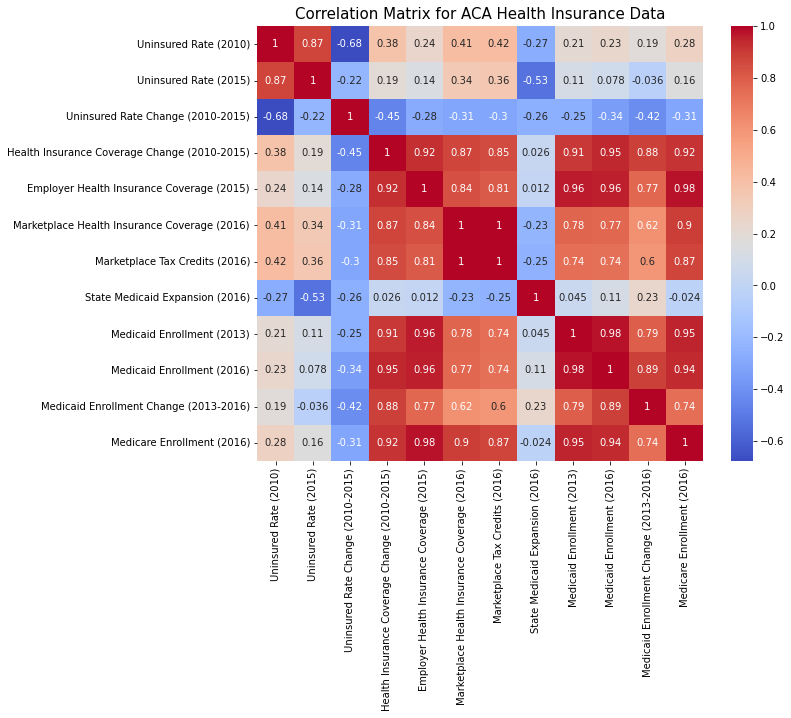

In [199]:
plt.figure(figsize=(10,8))
corrM = df.corr()
sns.heatmap(corrM, annot=True, cmap='coolwarm');
plt.title('Correlation Matrix for ACA Health Insurance Data', pad= 7, fontsize = 15);

The matrix reveals a high correlativity for many values. This gives me an idea about a few areas to explore with further analysis. Some the areas include: 

- Uninsured Rate Change from UI Rate 2010 to UI Rate 2015
- Health Insurance Coverage Change from Employer Health Insurance, Marketplace Tax Credits, & Medicaid/Medicare Enrollment
- Medicaid/Medicare Enrollment Change from Market Expansion and Employer Health Insurance

<hr/>

<h2>3. Answering Questions About The Data</h2>

Nothing significantly alarming was observed in the statistical data. However, a few questions have spawned from observing the correlation matrix.

<font>Firstly, a significant change in 'Uninsured Rate' between 2010-2015 was noticed in the data. This begs questions such as:</font>
    
    - Which states saw the largest reduction in 'Uninsured Rate'?</b>
    - Which states saw the smallest reduction in 'Uninsured Rate'?</b>        
    - What's the strength of the correlation between Marketplace Coverage and Tax Credits?</b>
    
    
<font>Secondly, Medicaid enrollment from 2013-2016 saw a nearly 25% increase in average enrollment. This leads to questions such :
    
    - Was enrollment higher in states that expanded medicare?</b> 
    - Which states had significantly less enrollment in 2016 that did expand medicaid?</b>
    
In this section, I'll sequentially explore those questions and share my conclusions. </font>

#### Q1. Which states saw the largest reductions in uninsured rates?

To answer this question I'll use a bar chart to compare the two periods and overall rate of change. 

I'll start by simplifying the data comparisons I want to make by creating a new dataframe with only the `states, and 2010/2015 UI Rates`. From there, I'll plot a side-by-side bar chart to visualize the rate change:

In [201]:
#Make a new dataframe with copies of columns from original dataframe:
uiRates = df[['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)','Uninsured Rate Change (2010-2015)']].copy()
uiRates.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015)
0,Alabama,14.6,10.1,-4.5
1,Alaska,19.9,14.9,-5.0
2,Arizona,16.9,10.8,-6.1
3,Arkansas,17.5,9.5,-8.0
4,California,18.5,8.6,-9.9


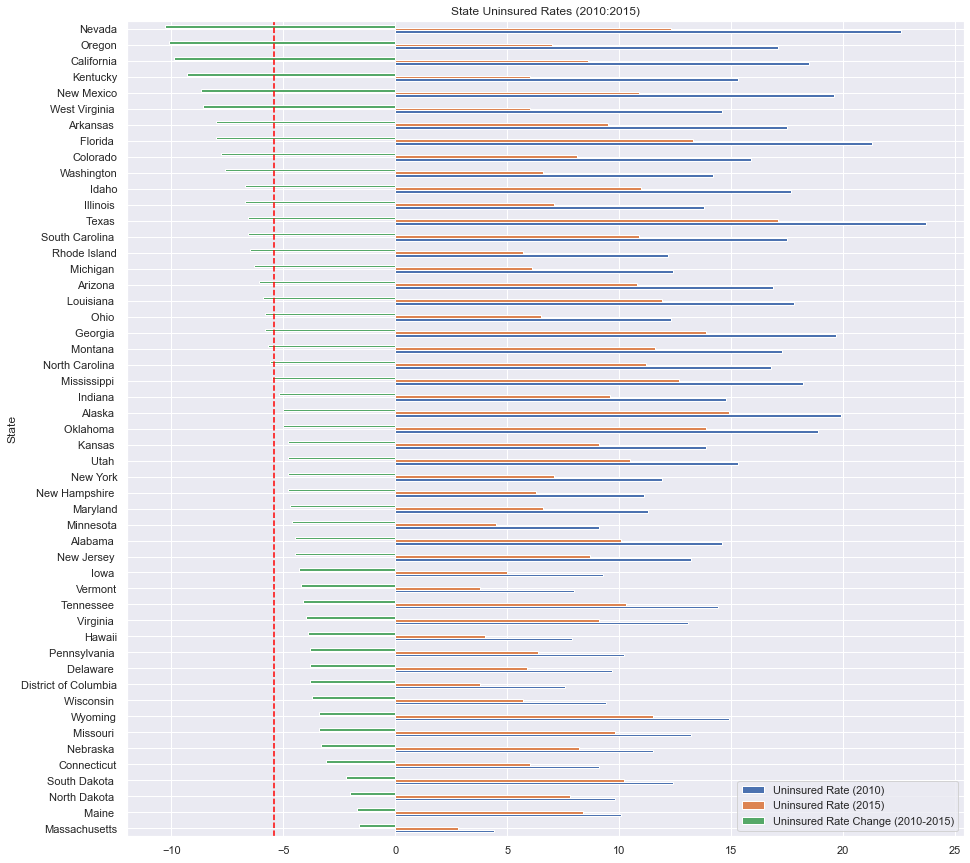

In [283]:
#Sort the values of rate change: 
uiRates = uiRates.sort_values(by=['Uninsured Rate Change (2010-2015)'], ascending=False)

#Creating a side-by-side bar chart:
uiRates.plot(kind='barh', x='State', title='State Uninsured Rates (2010:2015)', figsize=(15,15));
plt.legend(loc='lower right')
plt.axvline(x=uiRates['Uninsured Rate Change (2010-2015)'].mean(), color='red', ls='--');

<ins>Answer Q1</ins>.<br> Nevada, Oregon, and California had significant reductions in their uninsured rates between 2010-2015.<br><br>
    

<hr/>

<ins><b>Q2. Which states saw thesmallest reductions in Uninsured Rates between 2010-2015</b></ins><br>

While the previous graph would allow us to answer this question as well, I would certainly like view only the smallest changes on their own. 

So I'll visualize all the states whose changes fall below the 25th percentile for comparision:

In [214]:
#Create new DF with lowest percentile states:
lowest = uiRates[uiRates['Uninsured Rate Change (2010-2015)'] > uiRates['Uninsured Rate Change (2010-2015)'].quantile(0.025)].head(10)

#Drop other columns from consideration:
lowest.drop(['Uninsured Rate (2010)', 'Uninsured Rate (2015)'], axis=1, inplace=True)

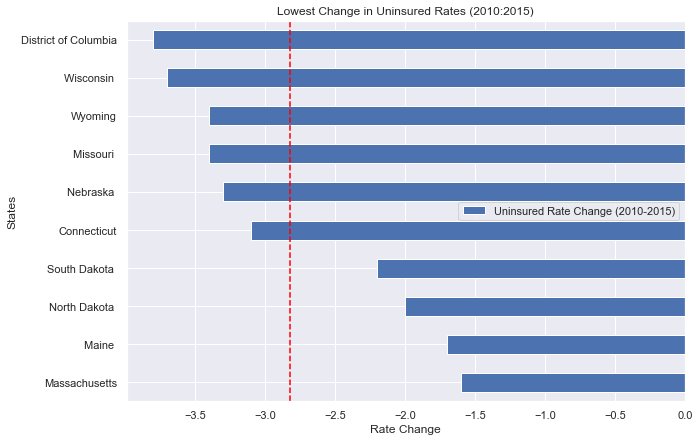

In [285]:
lowest.plot(kind='barh', x='State', title='Lowest Change in Uninsured Rates (2010:2015)', figsize=(10,7));
plt.ylabel('States')
plt.xlabel('Rate Change')
plt.axvline(x=lowest['Uninsured Rate Change (2010-2015)'].mean(), color='red', ls='--');

<ins>Answer Q2</ins>.<br> North Dakota, South Dakota, Maine, and Massachusetts had some of the lowest relative reduction in uninsured rates during the same period.<br><br>

In [225]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "xxkohxx/aca-health-insurance-coverage-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis


'https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis'

<hr/>

<ins><b>Q3. How strong is the correlation between Marketplace Coverage and Tax Credits?</b></ins>

<font size=3>Based on the previously plotted correlation matrix, I know that there is a 1:1 correlationship between the two categories. By plotting the points and establishing regression, I can conclude that strong correlation with accuracy.</font>

In [219]:
#Create new df copy of original df: 
corrDF = df[['State','Marketplace Health Insurance Coverage (2016)','Marketplace Tax Credits (2016)']].copy()

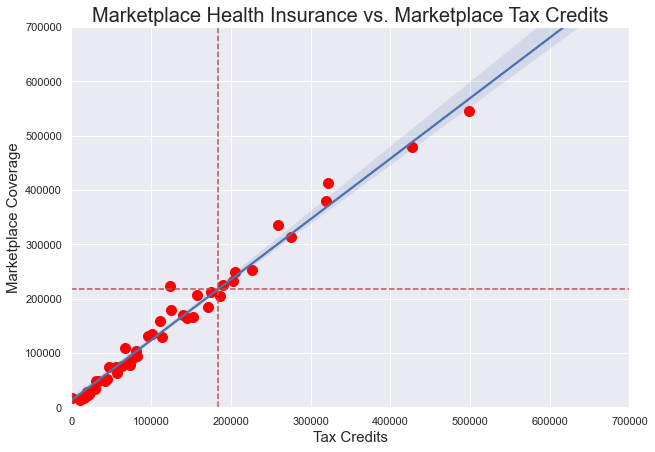

In [304]:
#Create regplot w/ values:
sns.set(rc={'figure.figsize':(10,7)})
x = corrDF['Marketplace Tax Credits (2016)']
y = corrDF['Marketplace Health Insurance Coverage (2016)']

sns.regplot(x='Marketplace Tax Credits (2016)', 
            y= 'Marketplace Health Insurance Coverage (2016)', 
            data=corrDF 
            ).set(xlim=(0,700000), 
                         ylim=(0,700000));
plt.title('Marketplace Health Insurance vs. Marketplace Tax Credits', size=20, pad=5)
plt.scatter(x,y,s=100, c='red')
plt.ylabel('Marketplace Coverage',size=15)
plt.xlabel('Tax Credits', size=15);
plt.axvline(x=corrDF['Marketplace Tax Credits (2016)'].mean(), c='r', ls='--')
plt.axhline(y=corrDF['Marketplace Health Insurance Coverage (2016)'].mean(), c='r', ls='--')

<ins>Q3 Answer</ins>.<br> <font size=3>There is a strong linear (almost perfect) correlation between Marketplace Health Insurance (MHI) and Marketplace Tax Credits (MTC). This makes sense as only those who purchase insurance through a state or federal health insurance marketplace can receive the credit (assuming they meet the income and family size criteria).<br><br>However, the data does not conclude that higher tax credits stem from higher marketplace coverage. This may be due to limited funding or other factors not evident in the dataset.</font>

In [221]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "xxkohxx/aca-health-insurance-coverage-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis


'https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis'

<hr/>

<ins><b>Q4. Was enrollment higher in states that expanded medicare?</b></ins>

In [226]:
#Create new dataframe from copy of original: 
expMC = df[['State','State Medicaid Expansion (2016)','Medicaid Enrollment (2013)','Medicaid Enrollment (2016)']].copy()
expMC.head()

,State,State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016)
0,Alabama,0,799176.0,910775
1,Alaska,1,122334.0,166625
2,Arizona,1,1201770.0,1716198
3,Arkansas,1,556851.0,920194
4,California,1,7755381.0,11843081


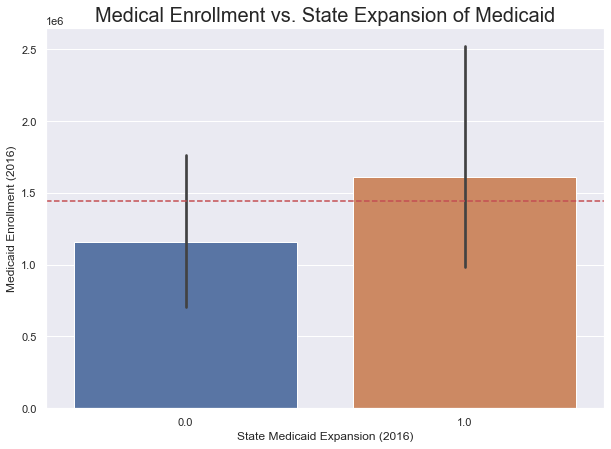

In [291]:
#Plot the dataframe:
sns.barplot(x='State Medicaid Expansion (2016)',y='Medicaid Enrollment (2016)', data=expMC)
plt.title('Medical Enrollment vs. State Expansion of Medicaid', fontsize=20)
plt.axhline(y=expMC['Medicaid Enrollment (2016)'].mean(), color='r', ls='--')

From the barplot we can see that states who expanded their Medicaid program also substantially increased their Medicaid enrollments in 2016. 

We can look deeper into this by viewing medicaid enrollment state-by-state:

In [266]:
#Appending Medicaid Enrollment Change to df:
expMC = df.append(['Medicaid Enrollment Change (2013-2016)'])

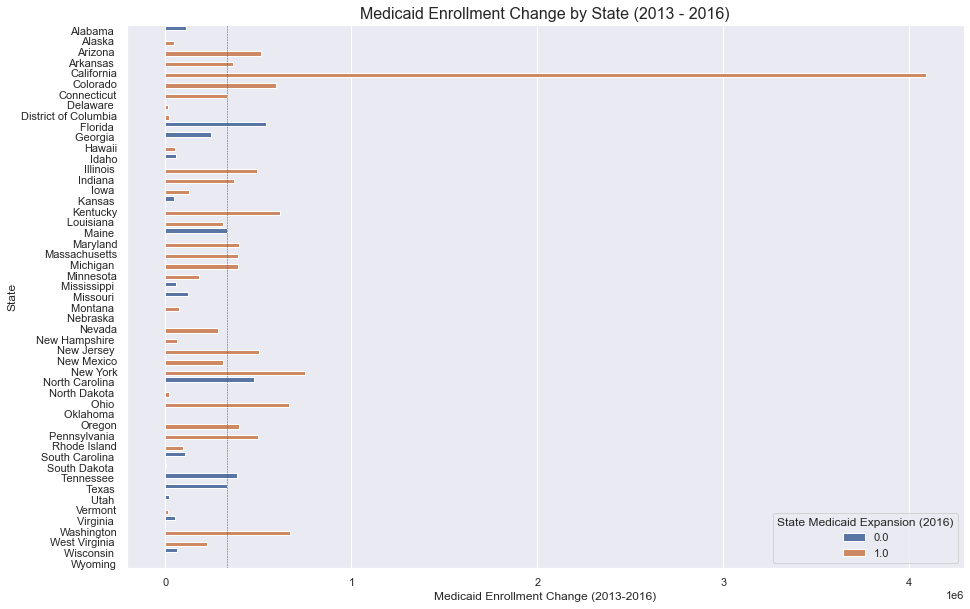

In [300]:
#Plotting Enrollment changes:
plt.figure(figsize=(15,10))
sns.barplot(x='Medicaid Enrollment Change (2013-2016)', y='State', data=expMC, hue='State Medicaid Expansion (2016)');
plt.title('Medicaid Enrollment Change by State (2013 - 2016)', fontsize=16)
plt.axvline(x=expMC['Medicaid Enrollment Change (2013-2016)'].mean(), color = 'red', ls='--', lw=.5);

From this perspective, we see that California had the largest medicaid enrollment coinciding with medicaid expansion in their state. Conclusions could be drawn that those states which expanded medicaid also improved enrollment moreso than those that did not on average.

In [301]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "xxkohxx/aca-health-insurance-coverage-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis


'https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis'

<hr/>

<h2>4. Inferences and Conclusions</h2>

The ACA was designed to improve healthcare access to the working poor and reduce costs associated with uncompensated healthcare, and effectively reform the private insurance market. The data does definitively conclude that those objectives were met with the enactment of ACA; however, it does show that more Americans have obtained health insurance since it was signed into law in 2010. 

My analysis of the ACA's impact on the US concludes with the following points:


1. Uninsured rates across the nation have decreased since ACA inception. Notably, almost half of the US states reduced their uninsured rate for the five year period following ACA's signing. Whether this is due to the accessibility of health insurance or other factors is unclear with the current dataset.


2. North/South Dakota, Maine, and Massechusettes saw relatively little change in UI rates b/w 2010-2015. Correlatively, the same states (excluding Massechusettes) also saw relatively little Medicaid enrollment in 2016 and were also identified as states that did not expand medicaid. Reasons for this are also not made clear in the data.


3. California has consistently reduced UI rates and increased coverage YOY since 2010. In fact, California has been exceptionally active in all things ACA. The state's size and population - as well as poverty rates - may be a factor but that is not made clear in the data.


4. Tax Credits and Marketplace Coverage are heavily correlated; however, credit increases do not correlate to coverage size. 


5. States that expanded Medicare in 2016 saw significantly more enrollments than those that did not.


<hr/>



<hr/>

<h2>5. References and Future Work</h2>

In the future it might be worth exploring the following topics: 

- How tax credits correlate to the financial situation of ACA recipients
- Analyzing Medicaid enrollment changes on a per capita basis
- Exploring the share of Marketplace Insurance Coverage and Employer Sponsored Health Insurance. 

<ins><b> References</b></ins>

- <a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3767707/#:~:text=The%20Patient%20Protection%20and%20Affordable,the%20way%20that%20medical%20decisions'>The Affordable Care Act: Objectives and Likely Results</a>
- <a href='https://www.kaggle.com/datasets/hhs/health-insurance/code'>Kaggle Dataset</a>
- <a href='https://jovian.ai/outlink?url=https%3A%2F%2Fseaborn.pydata.org%2Ftutorial.html'>Seaborn User Guide & Tutorial</a>

In [305]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "xxkohxx/aca-health-insurance-coverage-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis


'https://jovian.ai/xxkohxx/aca-health-insurance-coverage-analysis'